In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load training and testing data
 
Training data includes the target variable (what we are trying to predict).
Test data contains only the predictor variables (what we are using to predict).


In [3]:

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

train_df.shape, test_df.shape

((1460, 81), (1459, 80))

### For feature handling let's put the train and test sets temporarily together

In [4]:
alldata_df = pd.concat([train_df,test_df], axis=0).reset_index(drop=True)

alldata_df.loc[1458:1461,]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500.0
1460,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1461,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN


In [5]:
alldata_df.shape

(2919, 81)

### Handle missing values

In [6]:
# NaN handling

alldata_df['LotFrontage'].fillna(value=alldata_df['LotFrontage'].mean(), inplace=True)

alldata_df.fillna(0, inplace=True)

alldata_df['BsmtFullBath'] = alldata_df['BsmtFullBath'].astype(int)
alldata_df['BsmtHalfBath'] = alldata_df['BsmtHalfBath'].astype(int)


In [7]:
alldata_df.loc[1458:1462,]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125.0
1459,1460,20,RL,75.0,9937,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2008,WD,Normal,147500.0
1460,1461,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,6,2010,WD,Normal,0.0
1461,1462,20,RL,81.0,14267,Pave,0,IR1,Lvl,AllPub,...,0,0,0,Gar2,12500,6,2010,WD,Normal,0.0
1462,1463,60,RL,74.0,13830,Pave,0,IR1,Lvl,AllPub,...,0,0,MnPrv,0,0,3,2010,WD,Normal,0.0


### Split categorical and continous numeric data

In [8]:
# test set has all same values -> remove this feature since it can't be used for prediction
test_df['Utilities'].value_counts()


AllPub    1457
Name: Utilities, dtype: int64

In [9]:
test_df['LowQualFinSF'].value_counts()


0       1445
80         1
108        1
114        1
140        1
205        1
259        1
312        1
362        1
431        1
436        1
450        1
512        1
697        1
1064       1
Name: LowQualFinSF, dtype: int64

In [10]:

categorical = pd.DataFrame()
continous = pd.DataFrame()

categorical_cols = ['MSSubClass','MSZoning','Street','Alley','LotShape',
'LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath',
'FullBath','HalfBath','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',
'GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold',
'SaleType','SaleCondition' ]

continuous_cols = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
'GrLivArea','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars',
'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','YrSold','PoolArea','MiscVal' ]

categorical[categorical_cols] = alldata_df[categorical_cols].astype(str)

continous[continuous_cols] = alldata_df[continuous_cols]


In [11]:
continous.head(2)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,PoolArea,MiscVal
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,2.0,548.0,0,61,0,0,0,2008,0,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,2.0,460.0,298,0,0,0,0,2007,0,0


In [12]:
categorical.head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,60,RL,Pave,0,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,0,0,0,2,WD,Normal
1,20,RL,Pave,0,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,0,0,0,5,WD,Normal


## Engineered features 

In [13]:
#categorical['MiscFeature'] == 'Shed'
#categorical[categorical['MiscFeature'] == 'Shed']['MiscFeature']
categorical.loc[categorical['MiscFeature'] != 'Shed','HasShed'] = 0
categorical.loc[categorical['MiscFeature'] == 'Shed','HasShed'] = 1

#categorical.drop(columns='MiscFeature',inplace=True)
#continous.drop(columns='MiscVal',inplace=True)
#continous.drop(columns='YrSold',inplace=True)

In [14]:
continous['LivLotRatio'] = continous['GrLivArea'] / continous['LotArea']
continous["Spaciousness"] = (continous['1stFlrSF'] + continous['2ndFlrSF']) / continous['TotRmsAbvGrd']
continous["TotalOutsideSF"] = continous['WoodDeckSF'] + continous['OpenPorchSF'] + continous['EnclosedPorch'] + continous['3SsnPorch'] + continous['ScreenPorch']

continous['NeighborhoodLotMean'] = alldata_df.groupby(by='Neighborhood')['LotArea'].transform('mean')

neighborhood_saleprice = train_df.groupby(by="Neighborhood")['SalePrice'].mean()
continous['NeighborhoodSalePriceMean'] = alldata_df.apply(lambda row: neighborhood_saleprice[row.Neighborhood], axis=1 )
#continous['NeighborhoodSalePriceMean']
#alldata_df['Neighborhood']

continous['TotalSF'] = continous['TotalBsmtSF'] + continous['1stFlrSF'] + continous['2ndFlrSF']


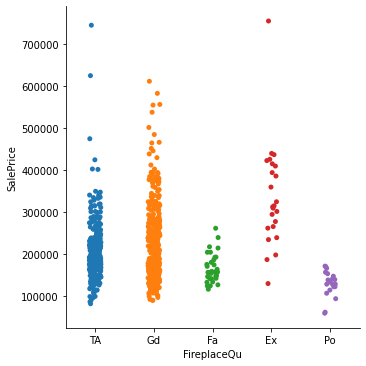

In [15]:
sns.catplot(x="FireplaceQu", y="SalePrice",data=train_df)

In [16]:
categorical.loc[(categorical['FireplaceQu'] == 'Fa') | (categorical['FireplaceQu'] == 'Po'),'HasLowQualityFirePlace'] = 1
categorical.loc[(categorical['FireplaceQu'] != 'Fa') & (categorical['FireplaceQu'] != 'Po'),'HasLowQualityFirePlace'] = 0
categorical['HasLowQualityFirePlace'].value_counts()

0.0    2799
1.0     120
Name: HasLowQualityFirePlace, dtype: int64

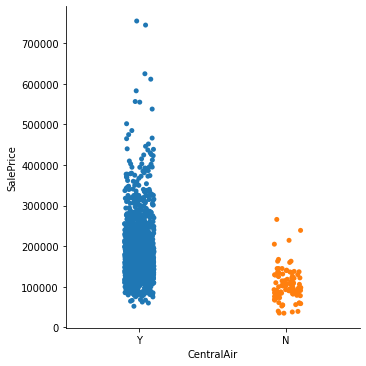

In [17]:
sns.catplot(x="CentralAir", y="SalePrice",data=train_df)

In [18]:
categorical.loc[(categorical['CentralAir'] == 'Y'),'CentralAir'] = 1
categorical.loc[(categorical['CentralAir'] == 'N'),'CentralAir'] = 0

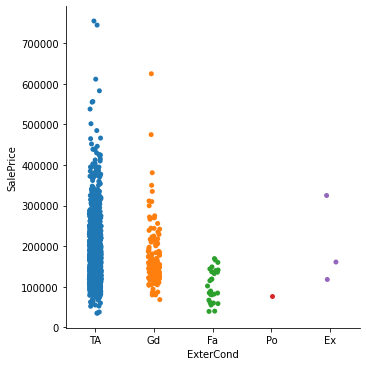

In [19]:

sns.catplot(x="ExterCond", y="SalePrice",data=train_df)
#categorical['BsmtCond'].value_counts()

<AxesSubplot:ylabel='SalePrice'>

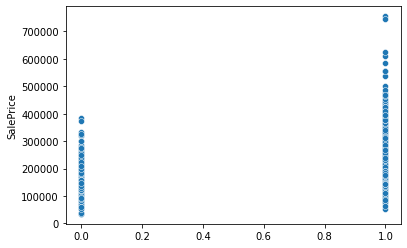

In [20]:
# Let's see if years from last remodeling has an effect on sale price

sns.scatterplot(x=(continous['YearRemodAdd'] - continous['YrSold']) > -15 ,y=train_df['SalePrice'])
#sns.scatterplot(x=continous['YearBuilt'] - continous['YearRemodAdd'],y=train_df['SalePrice'])

In [21]:
# It seems to have indeed, let's add it as a feature
continous['YearsSinceRemodeling'] = continous['YrSold'] - continous['YearRemodAdd']
categorical.loc[(continous['YearRemodAdd'] - continous['YrSold']) > -15,'RemodelLessThan15YearsAgo'] = 1
categorical.loc[(continous['YearRemodAdd'] - continous['YrSold']) <= -15,'RemodelLessThan15YearsAgo'] = 0

#categorical['RemodelLessThan20YearsAgo'].value_counts()

## Let's look at the effect of the continuous numerical features to sale price

In [22]:
continous.corrwith(train_df['SalePrice']).sort_values(ascending=False)

OverallQual                  0.790982
TotalSF                      0.782260
NeighborhoodSalePriceMean    0.738630
GrLivArea                    0.708624
GarageCars                   0.640409
GarageArea                   0.623431
TotalBsmtSF                  0.613581
1stFlrSF                     0.605852
Spaciousness                 0.546174
TotRmsAbvGrd                 0.533723
YearBuilt                    0.522897
YearRemodAdd                 0.507101
MasVnrArea                   0.472614
Fireplaces                   0.466929
TotalOutsideSF               0.390993
BsmtFinSF1                   0.386420
LotFrontage                  0.334820
WoodDeckSF                   0.324413
2ndFlrSF                     0.319334
OpenPorchSF                  0.315856
NeighborhoodLotMean          0.294890
LotArea                      0.263843
GarageYrBlt                  0.261366
BsmtUnfSF                    0.214479
BedroomAbvGr                 0.168213
ScreenPorch                  0.111447
PoolArea    

In [23]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(continous.iloc[0:1460,:],train_df['SalePrice'])

mi_scores = pd.Series(mi_scores, index=continous.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

TotalSF                      0.678765
OverallQual                  0.566571
NeighborhoodSalePriceMean    0.519707
GrLivArea                    0.480984
NeighborhoodLotMean          0.444284
GarageCars                   0.380460
TotalBsmtSF                  0.366838
GarageArea                   0.364969
YearBuilt                    0.350747
1stFlrSF                     0.308643
GarageYrBlt                  0.257912
YearsSinceRemodeling         0.252888
YearRemodAdd                 0.250537
Spaciousness                 0.247959
TotRmsAbvGrd                 0.223156
LotFrontage                  0.219230
2ndFlrSF                     0.199207
Fireplaces                   0.169781
LotArea                      0.158069
OpenPorchSF                  0.153752
BsmtFinSF1                   0.141697
TotalOutsideSF               0.125409
BsmtUnfSF                    0.119811
WoodDeckSF                   0.114206
OverallCond                  0.107548
LivLotRatio                  0.085712
MasVnrArea  

## Let's create the encoded dataframe for categorical variables

This will be later joined with the continuous numerical data

In [24]:
# use either dummies or label encoded values

useDummies = True

if useDummies:

    categoric_encoded_df = pd.get_dummies(categorical)
else:

    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()

    categoric_encoded_df = pd.DataFrame()
    for column in categorical: 
        #print('Colunm : ', column) 

        categoric_encoded_df[column] = le.fit_transform(categorical[column])
    
#
categoric_encoded_df.head(2)



,HasShed,HasLowQualityFirePlace,RemodelLessThan15YearsAgo,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.0,0.0,0.0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


<AxesSubplot:xlabel='OverallQual', ylabel='Density'>

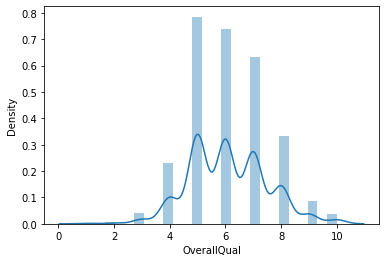

In [25]:
sns.distplot(train_df['OverallQual'])


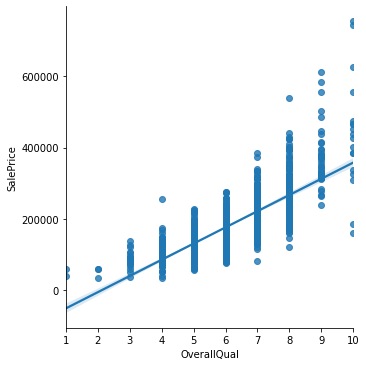

In [26]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train_df)

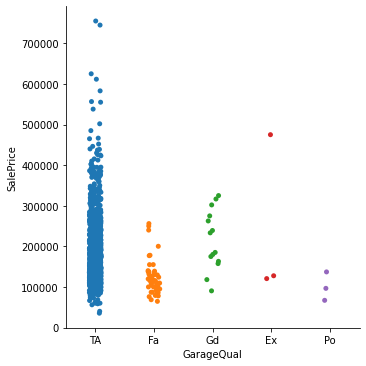

In [27]:
sns.catplot(x="GarageQual", y="SalePrice",data=train_df)

<AxesSubplot:xlabel='GrLivAreaLog', ylabel='Density'>

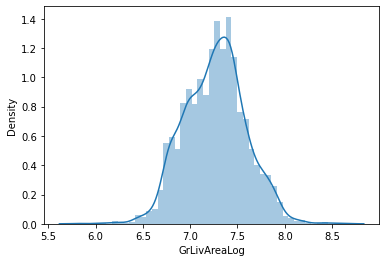

In [28]:
continous['GrLivAreaLog'] = np.log1p(alldata_df['GrLivArea'])
continous.drop(columns='GrLivArea',inplace=True)
sns.distplot(continous['GrLivAreaLog'])

<AxesSubplot:xlabel='LotAreaLog', ylabel='Density'>

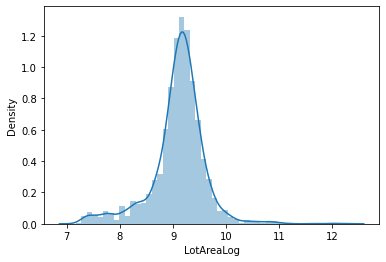

In [29]:
continous['LotAreaLog'] = np.log1p(alldata_df['LotArea'])
continous.drop(columns='LotArea',inplace=True)
sns.distplot(continous['LotAreaLog'])

<AxesSubplot:xlabel='LotAreaLog', ylabel='SalePrice'>

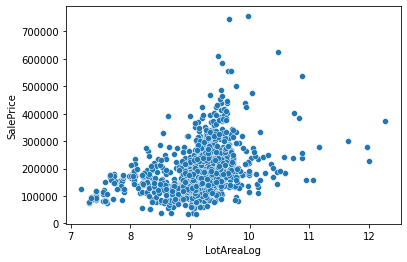

In [30]:

sns.scatterplot(x=continous['LotAreaLog'],y=train_df['SalePrice'])


## Let's split the train and test sets apart again

In [31]:
combined_df = categoric_encoded_df
combined_df = pd.concat([combined_df,continous ], axis=1)
combined_df.head()

,HasShed,HasLowQualityFirePlace,RemodelLessThan15YearsAgo,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,...,MiscVal,LivLotRatio,Spaciousness,TotalOutsideSF,NeighborhoodLotMean,NeighborhoodSalePriceMean,TotalSF,YearsSinceRemodeling,GrLivAreaLog,LotAreaLog
0,0.0,0.0,1.0,0,0,0,0,0,0,0,...,0,0.202367,213.750000,61,9999.752809,197965.773333,2566.0,5,7.444833,9.042040
1,0.0,0.0,0.0,0,0,0,0,0,1,0,...,0,0.131458,210.333333,298,15482.208333,238772.727273,2524.0,31,7.141245,9.169623
2,0.0,0.0,1.0,0,0,0,0,0,0,0,...,0,0.158756,297.666667,42,9999.752809,197965.773333,2706.0,6,7.488294,9.328212
3,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0.179791,245.285714,307,11650.106796,210624.725490,2473.0,36,7.448916,9.164401
4,0.0,0.0,1.0,0,0,0,0,0,0,0,...,0,0.154137,244.222222,276,12975.577465,335295.317073,3343.0,8,7.695758,9.565284


In [32]:
from sklearn.model_selection import train_test_split

temp_train_df = combined_df.loc[0:1459,:]
X_test = combined_df.loc[1460:,:]

X = temp_train_df
y = train_df['SalePrice'] 

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=42)

#X_train.columns


In [33]:
X_test.isna().sum()


HasShed                      0
HasLowQualityFirePlace       0
RemodelLessThan15YearsAgo    0
MSSubClass_120               0
MSSubClass_150               0
                            ..
NeighborhoodSalePriceMean    0
TotalSF                      0
YearsSinceRemodeling         0
GrLivAreaLog                 0
LotAreaLog                   0
Length: 355, dtype: int64

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import HuberRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_score
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)

model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.052,max_depth = 4, alpha = 8, n_estimators = 380)

scores = cross_val_score(model, X, y, cv=6, scoring='neg_root_mean_squared_error')
print("RMSE: {} STD: {}".format(scores.mean(), scores.std()) )
#scores = cross_val_score(model, X, y, cv=5, scoring='r2')
#print("R2: {} STD: {}".format(scores.mean(), scores.std()) )

RMSE: -24022.231160364707 STD: 3170.995641531546


### Train the model

In [38]:



model.fit(X,y)

XGBRegressor(alpha=8, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.052, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=380, n_jobs=24, num_parallel_tree=1, random_state=0,
             reg_alpha=8, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Predict for the test set

In [39]:
predictions = model.predict(X_test)

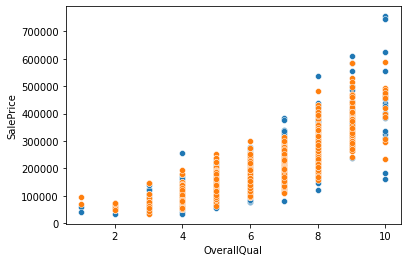

In [40]:

ax = sns.scatterplot(X["OverallQual"], y)
ax = sns.scatterplot(X_test["OverallQual"], predictions.flatten())


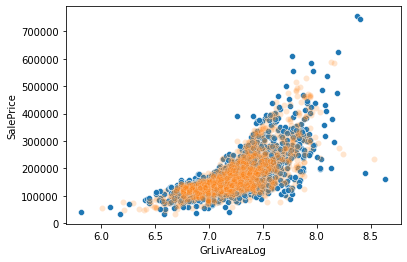

In [41]:
ax = sns.scatterplot(X["GrLivAreaLog"], y)
ax = sns.scatterplot(X_test["GrLivAreaLog"], predictions.flatten(), alpha=0.2)

### Create predictions file

In [42]:

submit = pd.DataFrame()
submit['Id'] = test_df['Id']
submit['SalePrice'] = predictions
submit.to_csv("forest_xgboost_3.csv", index=False)


## Diagnostics

Keep model diagnostics code here

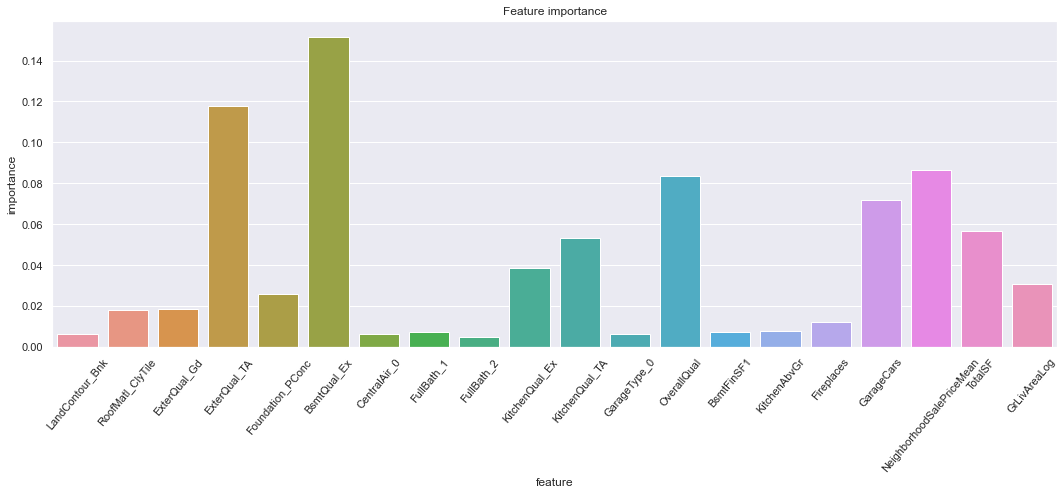

In [49]:
feat_importance_df = pd.DataFrame()
feat_importance_df['feature'] = X.columns.to_list()
feat_importance_df['importance'] = model.feature_importances_.tolist()

feat_importance_df[feat_importance_df['importance'] > 0.005]

most_important = feat_importance_df[feat_importance_df['importance'] > 0.005]

sns.set(rc={'figure.figsize':(18,6)})
sns.barplot( data=most_important, x="feature", y = "importance" ,ci = None)
plt.xticks(rotation=50)
text = plt.title("Feature importance")